In [1]:
!pip install tensorflow-addons
#!pip install tensorflow
!pip install pydot
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing

In [2]:
#read dataset
header = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 
                  'capital-loss', 'hours-per-week', 'native-country', 'salary']
df = pd.read_csv("D:/Fauzan/Study PhD/Semester 1/Machine Learning/Homework/HW3/Adult Dataset/adult.data.csv",index_col=False, skipinitialspace=True,header=None,names=header)

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.shape

(32561, 15)

In [5]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

### 1. Preprocessing

##### 1.1. Change ? to NaN value

In [6]:
df = df.replace('?', np.nan)
df[pd.isnull(df).any(axis=1)].shape

(2399, 15)

##### 1.2. Drop rows containing NaN

In [7]:
print(df.shape)
df.dropna(inplace=True)
df.shape

(32561, 15)


(30162, 15)

##### 1.3. Deal with categorical columns

In [8]:
#drop education-num column
df.drop('education-num', axis=1, inplace=True)

#collect group categorical column 
categorical_columns = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country']
label_column = ['salary']

#identify how many value in the categorical column
def show_unique_values(columns):
  for column in columns:
    uniq = df[column].unique().tolist()
    print(column+ " has "+ str(len(uniq)) +" values" + " : " + str(uniq))
show_unique_values(categorical_columns)
show_unique_values(label_column)

workclass has 7 values : ['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov', 'Local-gov', 'Self-emp-inc', 'Without-pay']
education has 16 values : ['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college', 'Assoc-acdm', '7th-8th', 'Doctorate', 'Assoc-voc', 'Prof-school', '5th-6th', '10th', 'Preschool', '12th', '1st-4th']
marital-status has 7 values : ['Never-married', 'Married-civ-spouse', 'Divorced', 'Married-spouse-absent', 'Separated', 'Married-AF-spouse', 'Widowed']
occupation has 14 values : ['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners', 'Prof-specialty', 'Other-service', 'Sales', 'Transport-moving', 'Farming-fishing', 'Machine-op-inspct', 'Tech-support', 'Craft-repair', 'Protective-serv', 'Armed-Forces', 'Priv-house-serv']
relationship has 6 values : ['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried', 'Other-relative']
race has 5 values : ['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other']
sex has 2 values : ['Male', 'Femal

In [9]:
#convert categorical column to integer
def convert_to_int(columns):
  for column in columns:
    unique_values = df[column].unique().tolist()
    dic = {}
    for indx, val in enumerate(unique_values):
      dic[val]=indx
    df[column] = df[column].map(dic).astype(int)
    print(column + " done!")
convert_to_int(label_column)
show_unique_values(label_column)

salary done!
salary has 2 values : [0, 1]


In [10]:
#create function convert to one hot to get a good one 
def convert_to_onehot(data,columns):
  dummies = pd.get_dummies(data[columns])
  data = data.drop(columns, axis=1)
  data = pd.concat([data, dummies], axis=1)
  return data

In [11]:
#show the changes after convert to onehot
df = convert_to_onehot(df,categorical_columns)
df.head()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,salary,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,0,0,13,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df.shape

(30162, 104)

##### 1.4. Normalize the Data

In [13]:
normalize_columns = ['age', 'fnlwgt', 'capital-gain','capital-loss','hours-per-week']

In [14]:
#create a function to show values
def show_values(columns):
  for column in columns:
    max_val = df[column].max()
    min_val = df[column].min()
    mean_val = df[column].mean()
    var_val = df[column].var()
    print(column +': values=['+str(min_val)+','+str(max_val)+'] , mean='+str(mean_val)+' , var='+str(var_val))

In [15]:
show_values(normalize_columns)

age: values=[17,90] , mean=38.437901995888865 , var=172.51941880039058
fnlwgt: values=[13769,1484705] , mean=189793.83393011073 , var=11162550392.80617
capital-gain: values=[0,99999] , mean=1092.0078575691268 , var=54853968.42891356
capital-loss: values=[0,4356] , mean=88.37248856176646 , var=163457.17237785677
hours-per-week: values=[1,99] , mean=40.93123798156621 , var=143.52002213363653


In [16]:
df_1 = df

In [17]:
#function normalize the data
def normalize(columns):
  scaler = preprocessing.StandardScaler()
  df[columns] = scaler.fit_transform(df[columns])

#calling function normalize and show values
normalize(normalize_columns)
show_values(normalize_columns)

age: values=[-1.632189153530554,3.9257151708095672] , mean=2.959490472313236e-16 , var=1.0000331553993425
fnlwgt: values=[-1.6660937164956222,12.256471482118583] , mean=-1.157264501499069e-17 , var=1.0000331553993544
capital-gain: values=[-0.14744462210705175,13.35457797222187] , mean=5.785659951483037e-16 , var=1.0000331553995523
capital-loss: values=[-0.21858597514475184,10.555813651103664] , mean=-7.284711333664981e-16 , var=1.0000331553986814
hours-per-week: values=[-3.3332180727392635,4.847228806449517] , mean=-9.79528790005519e-16 , var=1.0000331553996653


In [18]:
df.head()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,salary,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.042796,-1.062722,0.146092,-0.218586,-0.077734,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.880288,-1.007871,-0.147445,-0.218586,-2.331531,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.033340,0.244693,-0.147445,-0.218586,-0.077734,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,1.108695,0.425240,-0.147445,-0.218586,-0.077734,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,-0.794697,1.406658,-0.147445,-0.218586,-0.077734,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


##### 1.5. Split the data to train, validation, and test

In [19]:
from sklearn.model_selection import train_test_split

x_data = df.drop('salary',axis=1)
y_labels = df['salary']

X_train, X_test, y_train, y_test = train_test_split(x_data,y_labels,test_size=0.2,shuffle=True)
# X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train,test_size=0.2,shuffle=True)

print(X_train.shape, y_train.shape)
# print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(24129, 103) (24129,)
(6033, 103) (6033,)


In [20]:
X_train.shape[1:]

(103,)

### 2. Multi Layer Perceptron Model

#### 2.1. Execution MLP Model

In [21]:
from keras import backend as K
def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
        
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
from keras.utils import plot_model

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

def Model():
    classifier = Sequential()
    classifier.add(Dense(units = 12, kernel_initializer = 'uniform', activation = 'relu', input_dim = 103))
    classifier.add(Dense(100, activation="relu"))
    classifier.add(Dense(50, activation="relu",kernel_regularizer=keras.regularizers.l2(l=0.1),name='hidden_layer'))
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', 
                       loss = ['mean_squared_error', keras.losses.BinaryCrossentropy()], 
                       metrics = ['mse', 'acc', 'Precision', 'Recall',f1])
    return classifier

classifier = Model()

In [23]:
import os
import time
path = "G:/NTUST/Semester 1/Machine Learning/Homework/HW3/Answer/"
root_logdir = os.path.join(path, "my_logs")
#os.mkdir(root_logdir)
def get_run_logdir():
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir()
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir,histogram_freq=1)

In [24]:
history = classifier.fit(X_train, y_train, epochs=25, validation_split=0.25, batch_size = 10, callbacks=[tensorboard_cb])

Epoch 1/25
1810/1810 [==============================] - 4s 2ms/step - loss: 0.3526 - mse: 0.1284 - acc: 0.8153 - precision: 0.7102 - recall: 0.4276 - f1: 0.4072 - val_loss: 0.1301 - val_mse: 0.1250 - val_acc: 0.8342 - val_precision: 0.7030 - val_recall: 0.5710 - val_f1: 0.5480
Epoch 2/25
1810/1810 [==============================] - 3s 2ms/step - loss: 0.1161 - mse: 0.1134 - acc: 0.8428 - precision: 0.6898 - recall: 0.6626 - f1: 0.6043 - val_loss: 0.1182 - val_mse: 0.1149 - val_acc: 0.8387 - val_precision: 0.6767 - val_recall: 0.6662 - val_f1: 0.5952
Epoch 3/25
1810/1810 [==============================] - 3s 2ms/step - loss: 0.1109 - mse: 0.1083 - acc: 0.8505 - precision: 0.7071 - recall: 0.6754 - f1: 0.6128 - val_loss: 0.1208 - val_mse: 0.1168 - val_acc: 0.8399 - val_precision: 0.7263 - val_recall: 0.5657 - val_f1: 0.5457
Epoch 4/25
1810/1810 [==============================] - 3s 2ms/step - loss: 0.1081 - mse: 0.1056 - acc: 0.8537 - precision: 0.7146 - recall: 0.6803 - f1: 0.6160 - val

In [25]:
classifier.save("MLPmodel.h5")

In [26]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                1248      
                                                                 
 dense_1 (Dense)             (None, 100)               1300      
                                                                 
 hidden_layer (Dense)        (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 8)                 408       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,015
Trainable params: 8,015
Non-trainable params: 0
_________________________________________________________________


In [27]:
classifier.evaluate(X_test, y_test)

189/189 [==============================] - 0s 993us/step - loss: 0.1076 - mse: 0.1068 - acc: 0.8454 - precision: 0.6985 - recall: 0.6935 - f1: 0.6782


[0.10757026821374893,
 0.10678686201572418,
 0.8453505635261536,
 0.6984957456588745,
 0.6935064792633057,
 0.6781830787658691]

In [28]:
print('\n', history.history.keys())


 dict_keys(['loss', 'mse', 'acc', 'precision', 'recall', 'f1', 'val_loss', 'val_mse', 'val_acc', 'val_precision', 'val_recall', 'val_f1'])


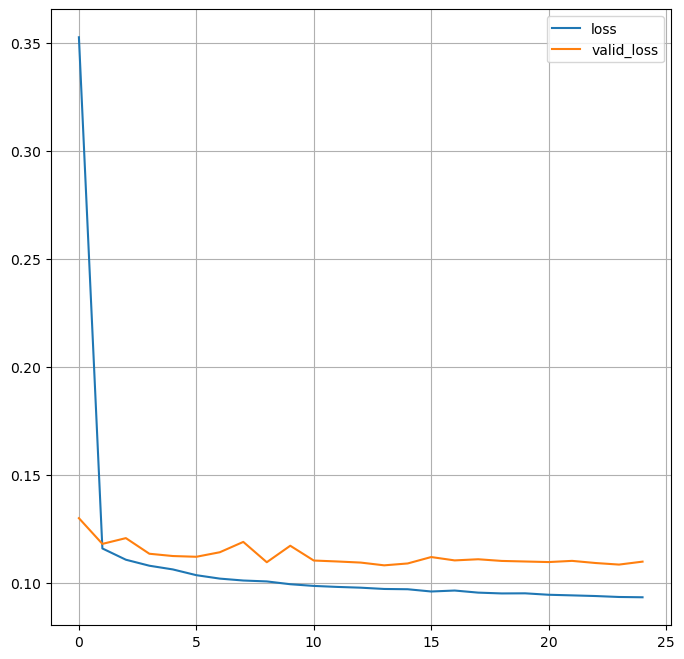

In [29]:
pd.DataFrame({'loss':history.history['loss'],
              'valid_loss':history.history['val_loss'],
              }).plot(figsize=(8, 8))
plt.grid(True)

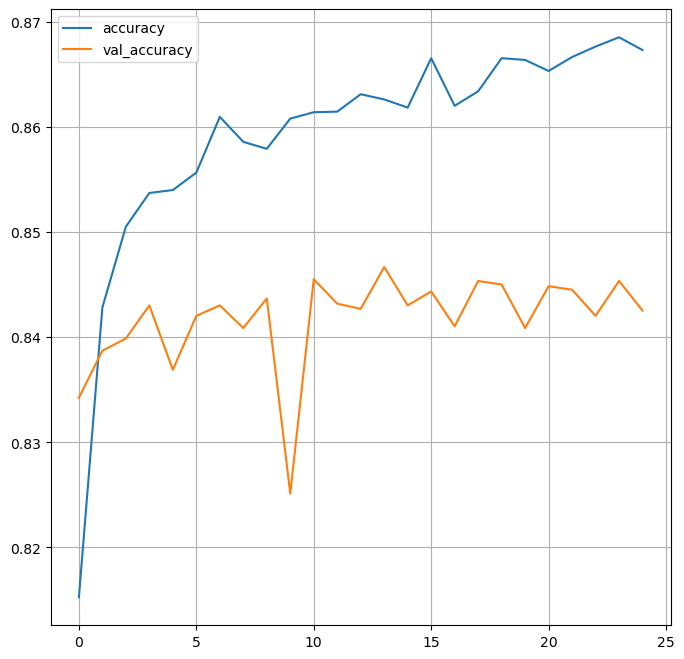

In [30]:
pd.DataFrame({'accuracy':history.history['acc'],
              'val_accuracy':history.history['val_acc']
              }).plot(figsize=(8, 8))
plt.grid(True)

In [31]:
y_pred = classifier.predict(X_test)
classes = np.argmax(y_pred, axis=1)
y_pred = (y_pred > 0.5)

189/189 [==============================] - 0s 767us/step


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test,y_pred))

[[4032  461]
 [ 472 1068]]


In [33]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

print('MLP model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

MLP model accuracy score: 0.8454


              precision    recall  f1-score   support

           0       0.90      0.90      0.90      4493
           1       0.70      0.69      0.70      1540

    accuracy                           0.85      6033
   macro avg       0.80      0.80      0.80      6033
weighted avg       0.84      0.85      0.85      6033



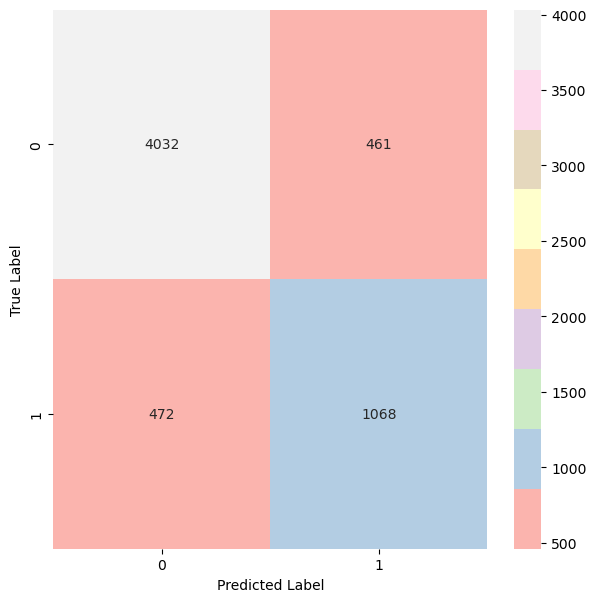

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import itertools

plt.figure(figsize=(7,7))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True,fmt="d",cmap = 'Pastel1')
ax.set_xlabel('MLP')

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
pass

print(classification_report(y_test, y_pred))

### 3. CNN Model

In [35]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
from numpy import unique

In [36]:
x_data = df.drop('salary',axis=1)
y_labels = df['salary']

In [37]:
print(x_data.shape)

(30162, 103)


In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_data = sc.fit_transform(x_data)

In [39]:
x_data = x_data.reshape(x_data.shape[0], x_data.shape[1], 1)
print(x_data.shape)

(30162, 103, 1)


In [40]:
print(unique(y_labels))
print(unique(y_labels).sum())

[0 1]
1


In [41]:
xtrain, xtest, ytrain, ytest = train_test_split(x_data, y_labels, test_size=0.2)

In [42]:
model = Sequential()
model.add(Conv1D(64, 2, activation="relu", input_shape=(103,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=16, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dense(16, activation="relu"))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(3, activation = 'softmax'))
model.compile(loss = 'sparse_categorical_crossentropy', 
     optimizer = "adam", metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 102, 64)           192       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 51, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 51, 32)            4128      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 25, 32)           0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 25, 16)            1040      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 12, 16)          

In [43]:
execution = model.fit(xtrain, ytrain, batch_size=25, epochs=25, validation_split=0.25, callbacks = [tensorboard_cb])
# history = classifier.fit(X_train, y_train, epochs=25, validation_split=0.25, batch_size = 10, callbacks = [tensorboard_cb])
# history = classifier.fit(X_train, y_train, epochs=25, validation_split=0.25, batch_size = 10)

Epoch 1/25
724/724 [==============================] - 4s 5ms/step - loss: 0.4414 - accuracy: 0.7944 - val_loss: 0.3531 - val_accuracy: 0.8318
Epoch 2/25
724/724 [==============================] - 3s 5ms/step - loss: 0.3681 - accuracy: 0.8260 - val_loss: 0.3599 - val_accuracy: 0.8276
Epoch 3/25
724/724 [==============================] - 3s 5ms/step - loss: 0.3579 - accuracy: 0.8319 - val_loss: 0.3395 - val_accuracy: 0.8362
Epoch 4/25
724/724 [==============================] - 3s 5ms/step - loss: 0.3517 - accuracy: 0.8347 - val_loss: 0.3410 - val_accuracy: 0.8377
Epoch 5/25
724/724 [==============================] - 3s 5ms/step - loss: 0.3462 - accuracy: 0.8391 - val_loss: 0.3336 - val_accuracy: 0.8391
Epoch 6/25
724/724 [==============================] - 3s 4ms/step - loss: 0.3443 - accuracy: 0.8383 - val_loss: 0.3308 - val_accuracy: 0.8437
Epoch 7/25
724/724 [==============================] - 3s 5ms/step - loss: 0.3399 - accuracy: 0.8425 - val_loss: 0.3269 - val_accuracy: 0.8460
Epoch 

In [44]:
model.save("CNNmodel.h5")

In [45]:
model.evaluate(xtest, ytest)

189/189 [==============================] - 0s 2ms/step - loss: 0.3117 - accuracy: 0.8551


[0.31173405051231384, 0.855130136013031]

In [46]:
print('\n', execution.history.keys())


 dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


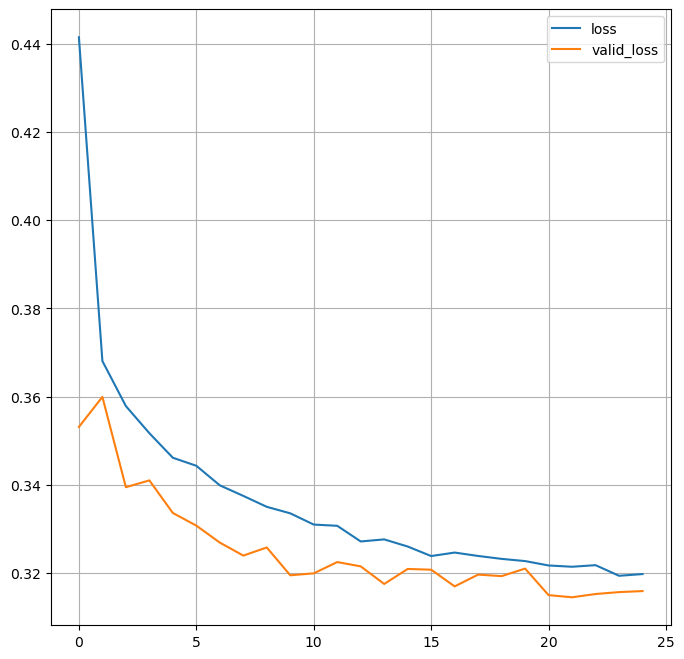

In [47]:
pd.DataFrame({'loss':execution.history['loss'],
              'valid_loss':execution.history['val_loss'],
              }).plot(figsize=(8, 8))
plt.grid(True)

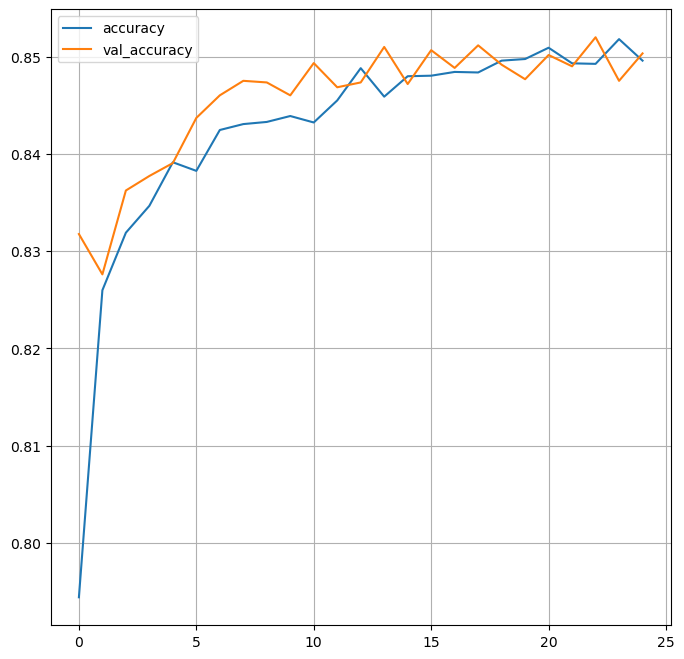

In [48]:
pd.DataFrame({'accuracy':execution.history['accuracy'],
              'val_accuracy':execution.history['val_accuracy']
              }).plot(figsize=(8, 8))
plt.grid(True)

In [49]:
ypred = model.predict(xtest)
classes = np.argmax(ypred, axis=1)
ypred = (y_pred > 0.5)

189/189 [==============================] - 0s 2ms/step


In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(confusion_matrix(ytest,ypred))

[[3409 1157]
 [1095  372]]


In [51]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

print('CNN model accuracy score: {0:0.4f}'. format(accuracy_score(ytest, ypred)))

CNN model accuracy score: 0.6267


              precision    recall  f1-score   support

           0       0.76      0.75      0.75      4566
           1       0.24      0.25      0.25      1467

    accuracy                           0.63      6033
   macro avg       0.50      0.50      0.50      6033
weighted avg       0.63      0.63      0.63      6033



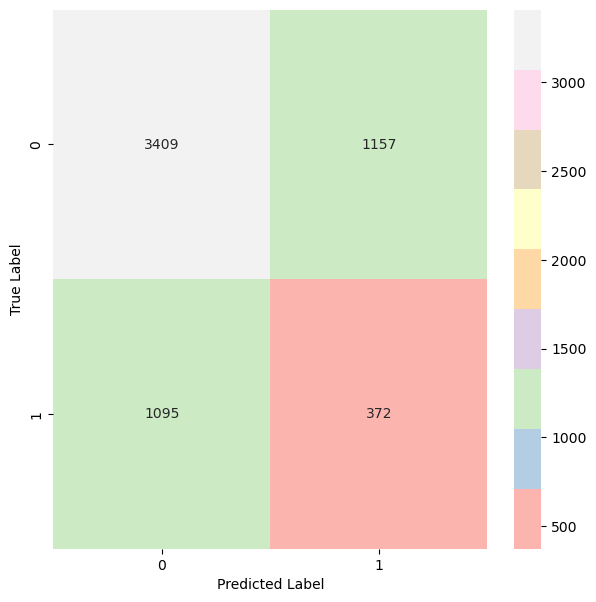

In [52]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import itertools

plt.figure(figsize=(7,7))
ax = sns.heatmap(confusion_matrix(ytest, ypred), annot=True,fmt="d",cmap = 'Pastel1')
ax.set_xlabel('MLP')

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
pass

print(classification_report(ytest, ypred))